In [9]:
# Required packages for this lab
import pandas as pd
import numpy as np
import matplotlib.dates as md
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [10]:
# Import dataset from csv file
df_shift = pd.read_csv('sample_data.csv',parse_dates=['date'])

Text(0, 0.5, 'Free Space (GB)')

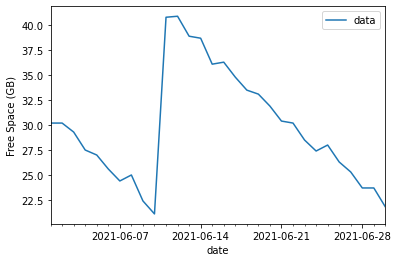

In [11]:
# Plot data to demonstrate disk space usage over time
ax = df_shift.plot.line(x='date', y='data')
ax.xaxis.set_major_locator(md.DayLocator(interval=7))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylabel("Free Space (GB)")

In [12]:
# After identifying disk growth event, we perform our data cleansing by 
# increasing all data values before this point by 20.
df_preprocess = df_shift.copy()
df_preprocess.loc[:9,'data'] += 20

Text(0, 0.5, 'Free Space (GB)')

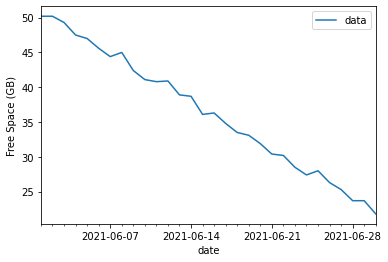

In [13]:
# Plot data to demonstrate disk space usage over time, factoring in the 
# expansion
ax = df_preprocess.plot.line(x='date', y='data')
ax.xaxis.set_major_locator(md.DayLocator(interval=7))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylabel("Free Space (GB)")

In [14]:
# Create our Linear regression function
# Split the data into test/train data
# Predict the future usage
# Return dataframe to visualise our predictions 
# Calculate the RMSE
def regression(df):
    X = df.index.values.reshape(-1,1)
    y = df.iloc[:, 1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,shuffle=False)
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    date_pred = df_shift[df_shift.index>=X_test.min()].date
    df_full = df.copy()
    df_full['prediction'] = [None] * X_test.min() + list(y_pred)
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    return df_full

In [15]:
# Run linear regression for our raw data
df = regression(df_shift)

Root Mean Squared Error: 9.694227075625104


Text(0, 0.5, 'Free Space (GB)')

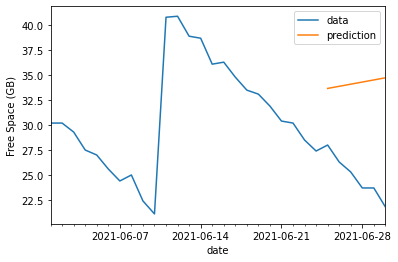

In [16]:
# Plot our prediction against the raw data
ax = df.plot(x='date', y=['data', 'prediction'])
ax.xaxis.set_major_locator(md.DayLocator(interval=7))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylabel("Free Space (GB)")

In [17]:
# Run linear regression for our cleansed data
df_corrected = regression(df_preprocess)

Root Mean Squared Error: 0.6948624359345673


Text(0, 0.5, 'Free Space (GB)')

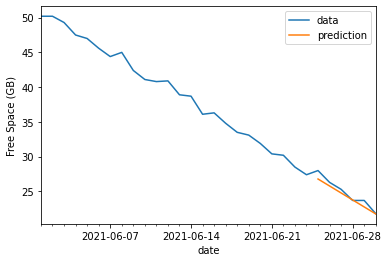

In [18]:
# Plot our prediction against the cleansed data
ax = df_corrected.plot(x='date', y=['data', 'prediction'])
ax.xaxis.set_major_locator(md.DayLocator(interval=7))
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))
ax.set_ylabel("Free Space (GB)")